# Задача № 337. Колебания в связанных контурах

[Практикум 337](http://genphys.phys.msu.ru/rus/lab/elmag/Lab337_2020.pdf)

В работе изучаются установившиеся вынужденные колебания в связанных линейных контурах с индуктивной и емкостной связью. В первом упражнении находятся собственные характеристики системы, путем изучения уединенного $L$-$C$  контура. Во втором и третьем упражнении проверяются теоретические зависимости для контура с индуктивной и емкостной связью соответственно. 

## Упражнение 1. Изучение резонанса в уединенном (несвязанном) контуре.

В этом упражнении по измеренным резонансной частоте и ширине пика по известному соотношению находится добротность контура:
$Q=\frac{f_{0}}{\Delta f}$
Из формулы Томсона $f_{0}=\frac{1}{2 \pi \sqrt{LC}}$, считая известной ёмкость контура $C$=0.47 мкФ, определяется индуктивность контура. Из выражения для добротности $Q= \frac{1}{R} \sqrt{\frac{L}{C}}$ находится сопротивление контура.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
## Упражнение 1
C_0 = 0.47
f_0 = np.array([6478.05, 6459.35, 6440.65])
f_right = np.array([6814.63, 6808.72, 6777.24])
f_left = np.array([6141.46, 6170.32, 6122.76])
u_max = np.array([0.021, 0.020, 0.021])
df = f_right - f_left
Q = f_0 / df
L = (2 * math.pi * f_0)**(-2.) / C_0 * 1e9
R = (L/C_0*1e3)**0.5 / Q
print ("L = ", L.mean(), "±", L.std(), "мГн")
print ("R = ", R.mean(), "±", R.std(), "Ом")
print ("Q = ", Q.mean(), "±", Q.std())
print ("f_0 = ", f_0.mean(), "±", f_0.std(), "Гц")

L =  1.291730905042833 ± 0.006106756038284111 мГн
R =  5.318649991616968 ± 0.10374806918204524 Ом
Q =  9.860698719020379 ± 0.20249918492559596
f_0 =  6459.350000000001 ± 15.2684860633487 Гц


## Упражнение 2. Изучение АЧХ индуктивно связанных контуров.

* Из найденных резонансных частот индуктивно связанного контура, используя соотношение $f_{0}= \frac{\sqrt{2}f_{01}f_{02}}{\sqrt{f_{1}^{2}+f_{2}^{2}}}$ находится собственная частота, которая должна совпадать с результатом из первого упражнения.
* Для сравнения на одном графике строятся зависимости $f_{0}(d)$, $f_{01}(d)$, $f_{02}(d)$
* По данным для $f_{01}$ и $f_{02}$ и значения $L$, найденного в упражнении 1, рассчитывается коэффициент взаимной индукции $L_{12}$ из формул $\omega_{1}=\frac{\omega_{0}}{\sqrt{1+\frac{L_{12}}{L}}}$ и $\omega_{2}=\frac{\omega_{0}}{\sqrt{1-\frac{L_{12}}{L}}}$, который не должен зависить от выбора используемой формулы вычисления.
* По формуле $K=\frac{L_{12}}{L}$ находится коэффициент связи.
* Строятся графики зависимости $L_{12}(d)$ и $K(d)$.




Сравнение значений собственной частоты из первого и второго упражнения соответственно
f_0 =  6459.350000000001 ± 15.2684860633487 Гц
f_0 =  6478.833111855338 ± 42.60335625136097 Гц



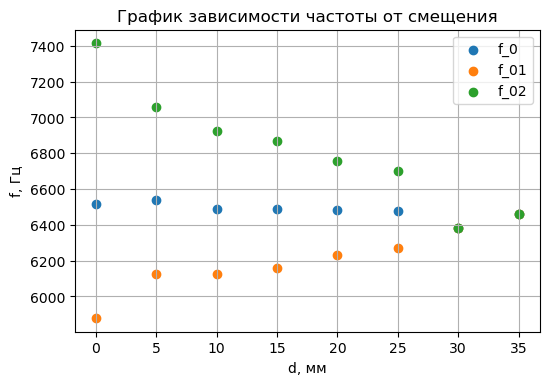

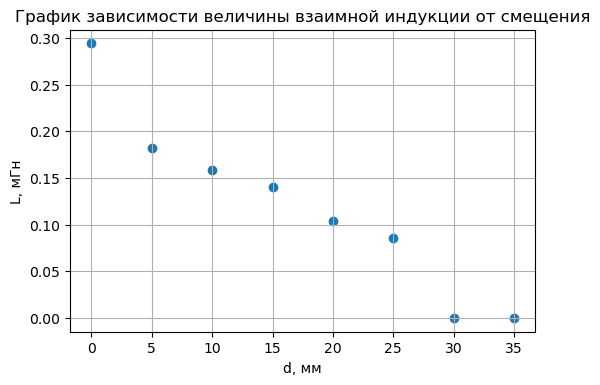

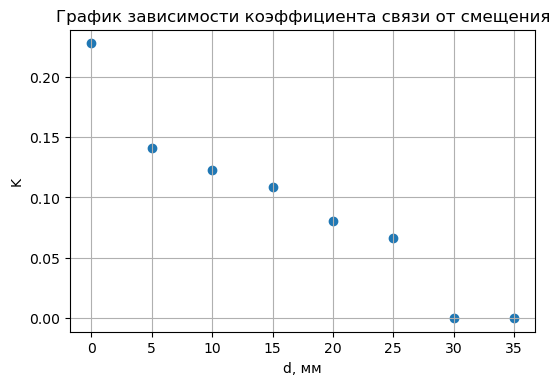

In [2]:
d = np.arange(0, 40, 5)
f_01 = np.array([5879.67, 6122.76, 6122.76, 6160.16, 6234.26, 6272.36, 6384.55, 6459.35])
f_02 = np.array([7413.01, 7057.72, 6926.83, 6870.73, 6758.54, 6702.44, 6384.55, 6459.35])
L_0 = L.mean()
f = math.sqrt(2.) * f_01 * f_02 / ((f_01 ** 2. + f_02 ** 2.) ** 0.5)
L_12 = L_0 * ((f / f_01) ** 2. - 1.)
L_21 = L_0 * (1. - (f / f_02) ** 2.)
K_1 = L_12 / L_0
K_2 = L_21 / L_0
assert np.allclose(L_12, L_21, 1e-15) #Проверка 3-го пункта
assert np.allclose(K_1, K_2, 1e-15)   #Проверка 4-го пункта


fig, ax = plt.subplots(dpi = 100)
ax.scatter(d, f, label = 'f_0')
ax.scatter(d, f_01, label = 'f_01')
ax.scatter(d, f_02, label = 'f_02')
plt.xlabel('d, мм')
plt.ylabel('f, Гц')
plt.title('График зависимости частоты от смещения')
plt.legend()
plt.grid(True)

fig, ax = plt.subplots(dpi = 100)
ax.scatter(d, L_12, label = 'L_12')
plt.xlabel('d, мм')
plt.ylabel('L, мГн')
plt.grid(True)
plt.title('График зависимости величины взаимной индукции от смещения')

fig, ax = plt.subplots(dpi = 100)
ax.scatter(d, K_1, label = 'K_1')
plt.xlabel('d, мм')
plt.ylabel('K')
plt.grid(True)
plt.title('График зависимости коэффициента связи от смещения')

print()
print("Сравнение значений собственной частоты из первого и второго упражнения соответственно")
print ("f_0 = ", f_0.mean(), "±", f_0.std(), "Гц")
print("f_0 = ", f.mean(), "±", f.std(), "Гц")
print()

# Упражнение 3. Изучение АЧХ контуров с емкостной связью.

* Находятся резонансные частоты для разных значений ёмкости связи.
* Для каждого значения ёмкости находится коэффициент связи по формуле $K=\frac{C}{C+C_{rel}}$
* Из выражений $\omega_{1}=\frac{1}{\sqrt{LC}}=\omega_{0}$ и $\omega_{2}=\omega_{0}\sqrt{\frac{1+K}{1-K}}$ определяются теоретические значения резонансных частот.
* На одном графике строятся зависимости (экспериментальные и теоретические) $f(d)$.
* Строится график $\large f_{02}^{2}-f_{01}^{2}$ от $\large\frac{2}{C_{rel}}$. Который, исходя из соотношений для резонансных частот: $f_{02}^{2}-f_{01}^{2}=(\frac{\omega_{0}}{2\pi})^{2}(\frac{1+K}{1-K}-1)=(\frac{\omega_{0}}{2\pi})^{2}(1+\frac{2C}{C_{rel}-1})=(\frac{\omega_{0}}{2\pi})^{2}\frac{2C}{C_{rel}}=С(\frac{\omega_{0}}{2\pi})^{2}\Large\frac{2}{C_{rel}}$, должен быть линейным. Тогда вполне логично провести линейную аппроксимацию зависимости методом наименьших квдратов и сравнить коффициенты полученной прямой с теоретическими значениями.
* Сторятся графики зависимости $f_{01}(K)$ и $f_{02}(K)$.

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



k =  22311710.584459208 мкФ*Гц^2
C_0*f^2 =  24642120.502120823 мкФ*Гц^2
b =  -10517208.53416209 Гц^2
sqrt(-b) =  3243.024596601464 Гц


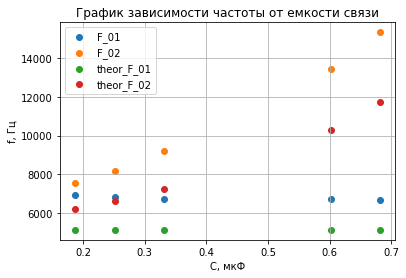

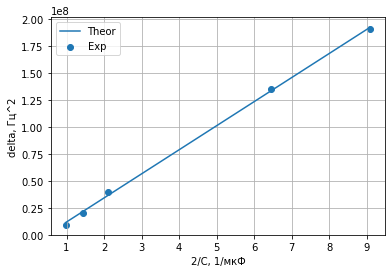

In [4]:
## Упражнение 3

C = np.array([2.04, 1.4, 0.95, 0.31, 0.22])
matrix_f_01 = np.array([[6889.43, 6852.03, 6758.54, 6721.14, 6665.04], 
                       [6926.83, 6829.27, 6699.19, 6731.71, 6682.93]])
matrix_f_02 = np.array([[7543.90, 8179.67, 9226.83, 13378.05, 15341.46],
                       [7528.46, 8195.12, 9219.51, 13463.42, 15349.59]])
F_01 = np.mean(matrix_f_01,axis=0)
F_02 = np.mean(matrix_f_02,axis=0)
dF_01 = np.std(matrix_f_01,axis=0)
dF_02 = np.std(matrix_f_02,axis=0)
K = C_0 / (C_0 + C)
f_res = 1 / (L_0*C_0*2*math.pi) ** 0.5 * 1e4
theor_F_01 = np.full((1,5), f_res)
theor_F_02 = f_res * ((1 + K)/(1 - K)) ** 0.5
delta = F_02 ** 2 - F_01 ** 2


fig, ax = plt.subplots()
ax.scatter(K, F_01, label = 'F_01')
ax.scatter(K, F_02, label = 'F_02')
ax.scatter(K, theor_F_01, label = 'theor_F_01')
ax.scatter(K, theor_F_02, label = 'theor_F_02')
plt.xlabel('C, мкФ')
plt.ylabel('f, Гц')
plt.legend()
plt.grid(True)
plt.title('График зависимости частоты от емкости связи')


#Метод МНК
A = np.vstack((2./C, np.ones_like(2./C))).T
A_pinv_direct = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_pinv_np = np.linalg.pinv(A)
np.allclose(A_pinv_direct, A_pinv_np)
A_pinv_direct.dot(delta)
k,b = np.linalg.lstsq(A, delta)[0]

fig, ax = plt.subplots()
ax.scatter(2./C, delta, label = 'Exp')
plt.ylabel('delta, Гц^2')
plt.xlabel('2/С, 1/мкФ')
ax.plot(2./C,k * 2./C + b, label = 'Theor')
plt.legend()
plt.grid(True)

print()
print("k = ", k, "мкФ*Гц^2")
print("C_0*f^2 = ", 2*C_0*f_res**2, "мкФ*Гц^2")
print("b = ", b, "Гц^2")
print("sqrt(-b) = ", (-b)**0.5, "Гц")

# Основные итоги работы

### Упражнение 1

$L$ = (1.292 ± 0.006) мГн

$R$ = (5.32 ± 0.10) Ом

$Q$ = (9.86 ± 0.20)

$f_{0}$ = (6459 ± 15) Гц

### Упражнение 2

Сравнение значений собственной частоты из первого и второго упражнения соответственно:

$f_{0}$ = (6459 ± 15) Гц

$f_{0}$ = (6479 ± 43) Гц

Видно, что значения совпадают в пределах погрешности.

Из постороенных графиков видно, что с увеличением расстояния между катушками уменьшается величина взаимной индукции и, как следствие, коэффициент связи. При смещении катушек на 30 мм и более максимумы АЧХ практически не различимы, совпадают значения резонансных частот и контуры уже можно считать несвязанными.

### Упражнение 3

График $f_{02}^{2}-f_{01}^{2}$ от $\large\frac{2}{C_{rel}}$ действительно получился линейным. 

$k=22311710.6$ $мкФГц^{2}$, когда $Cf_{0}^{2}=24642120.5$ $мкФГц^{2}$.

$\sqrt{|b|}$=3243 Гц, когда, вообще говоря, $b$ должно было равняться нулю.

Из зависимостей резонансных частот от ёмкости связи видно, что эксперимент совпадает с теорией при малых значениях ёмкости, что и следовало ожидать, так как при больших значениях ёмкости током через перемычку можно пренебречь и тогда схема становится эквивалентной уединенному(несвязанному) контуру.

